# Beat Tracking

In [44]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.stats

import utils
import creation


AUDIO_DIR = os.environ.get('C:/Users/laelu/fma/data/fma_electronic')

f1='C:/Users/laelu/fma/data/fma_electronic/001066.mp3'
y , sr = librosa.load(f1,duration=10)

C:\Users\laelu\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


### Audio Waveform

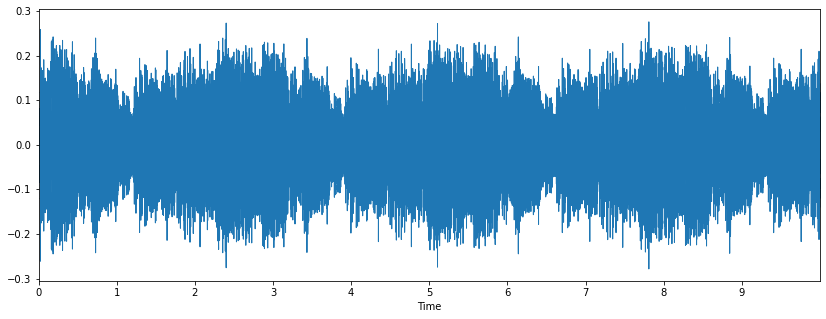

In [41]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y, sr)

# Beat tracking
### librosa.beat.beat_track

In [4]:
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)

In [5]:
tempo

112.34714673913044

In [6]:
beats

array([  9,  32,  54,  77, 102, 125, 148, 171, 194, 218, 242, 265, 287,
       310, 335, 358, 381])

In [7]:
librosa.frames_to_time(beats, sr=sr)

array([0.20897959, 0.74303855, 1.25387755, 1.78793651, 2.36843537,
       2.90249433, 3.43655329, 3.97061224, 4.5046712 , 5.06195011,
       5.61922902, 6.15328798, 6.66412698, 7.19818594, 7.77868481,
       8.31274376, 8.84680272])

### Beat tracking using pre-computed onset envelope

In [8]:
onset_env = librosa.onset.onset_strength(y, sr=sr,aggregate=np.median)
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env,sr=sr)

In [9]:
tempo

112.34714673913044

In [10]:
beats

array([  9,  32,  54,  77, 102, 125, 148, 171, 194, 218, 242, 265, 287,
       310, 335, 358, 381])

### Plot beat events vs. onset strength envelope

C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


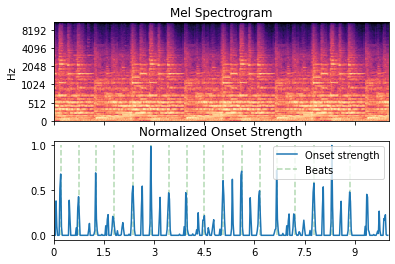

In [13]:
hop_length = 512
fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(onset_env, sr=sr, hop_length=hop_length)
M = librosa.feature.melspectrogram(y=y, sr=sr, hop_length=hop_length)

librosa.display.specshow(librosa.power_to_db(M, ref=np.max),y_axis='mel', x_axis='time', hop_length=hop_length,ax=ax[0])

ax[0].label_outer()
ax[0].set(title='Mel Spectrogram')

ax[1].set(title='Normalized Onset Strength')
ax[1].plot(times, librosa.util.normalize(onset_env),label='Onset strength')
ax[1].vlines(times[beats], 0, 1, alpha=0.3, color='g',linestyle='--', label='Beats')
ax[1].legend()

### Mel Spectrogram vs. PLP + Onset Strength Envelope: Uniform and Log Normal Tempos

C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\laelu\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


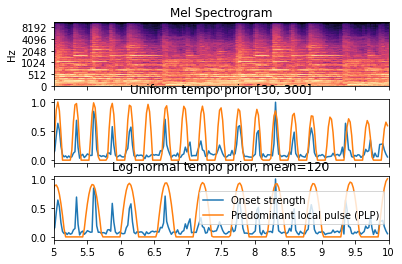

In [24]:
onset_env = librosa.onset.onset_strength(y=y, sr=sr)
pulse = librosa.beat.plp(onset_envelope=onset_env, sr=sr)

prior = scipy.stats.lognorm(loc=np.log(120), scale=120, s=1)
pulse_lognorm = librosa.beat.plp(onset_envelope=onset_env, sr=sr,prior=prior)

melspec = librosa.feature.melspectrogram(y=y, sr=sr)

fig, ax = plt.subplots(nrows=3, sharex=True)
librosa.display.specshow(librosa.power_to_db(melspec,ref=np.max),x_axis='time', y_axis='mel', ax=ax[0])

ax[0].set(title='Mel Spectrogram')
ax[0].label_outer()

ax[1].plot(librosa.times_like(onset_env),librosa.util.normalize(onset_env),label='Onset strength')
ax[1].plot(librosa.times_like(pulse),librosa.util.normalize(pulse),label='Predominant local pulse (PLP)')
ax[1].set(title='Uniform tempo prior [30, 300]')
ax[1].label_outer()

ax[2].plot(librosa.times_like(onset_env),librosa.util.normalize(onset_env),label='Onset strength')
ax[2].plot(librosa.times_like(pulse_lognorm),librosa.util.normalize(pulse_lognorm),label='Predominant local pulse (PLP)')
ax[2].set(title='Log-normal tempo prior, mean=120', xlim=[5, 10])
ax[2].legend()

### Beat Tracking vs. PLP Local Max

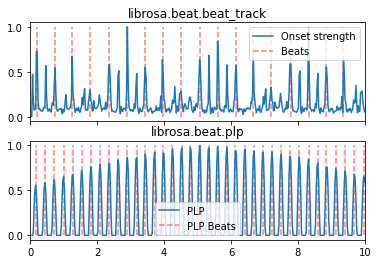

In [30]:
tempo, beats = librosa.beat.beat_track(onset_envelope=onset_env)
beats_plp = np.flatnonzero(librosa.util.localmax(pulse))
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

times = librosa.times_like(onset_env, sr=sr)

ax[0].plot(times, librosa.util.normalize(onset_env),label='Onset strength')
ax[0].vlines(times[beats], 0, 1, alpha=0.5, color='r',linestyle='--', label='Beats')
ax[0].legend()
ax[0].set(title='librosa.beat.beat_track')
ax[0].label_outer()

times = librosa.times_like(pulse, sr=sr)

ax[1].plot(times, librosa.util.normalize(pulse),label='PLP')
ax[1].vlines(times[beats_plp], 0, 1, alpha=0.5, color='r',linestyle='--', label='PLP Beats')
ax[1].legend()
ax[1].set(title='librosa.beat.plp', xlim=[0, 10])
ax[1].xaxis.set_major_formatter(librosa.display.TimeFormatter())